https://www.machinelearningplus.com/nlp/topic-modeling-visualization-how-to-present-results-lda-models/

In [55]:
import pandas as pd
from pandas import DataFrame, concat
import numpy as np
df_update = pd.read_csv('df_update.csv', index_col=[0])
skill_cell = pd.read_csv('skill_cell.csv',header=None)

In [56]:
df_update.shape

(1151, 221)

In [60]:
skill_cell

,skill_list
0,"Python,SQL,R,Spark,Hive,AWS,Data-Warehouse"
1,"SQL,R"
2,R
3,"R,Microsoft-Office"
4,R
...,...
1146,0
1147,R
1148,0
1149,"SQL,R,Azure"


In [58]:
skill_cell.columns=['skill_list']
skill_cell.head()

,skill_list
0,"Python,SQL,R,Spark,Hive,AWS,Data-Warehouse"
1,"SQL,R"
2,R
3,"R,Microsoft-Office"
4,R


In [61]:
list_of_skill = skill_cell['skill_list'].to_list()

In [62]:
list_of_skill[:3]

['Python,SQL,R,Spark,Hive,AWS,Data-Warehouse', 'SQL,R', 'R']

In [63]:
from nltk.tokenize import word_tokenize
example = list_of_skill
tokenized_sents = [word_tokenize(i) for i in example]

In [64]:
tokenized_sents

[['Python',
  ',',
  'SQL',
  ',',
  'R',
  ',',
  'Spark',
  ',',
  'Hive',
  ',',
  'AWS',
  ',',
  'Data-Warehouse'],
 ['SQL', ',', 'R'],
 ['R'],
 ['R', ',', 'Microsoft-Office'],
 ['R'],
 ['0'],
 ['0'],
 ['R'],
 ['Python',
  ',',
  'SQL',
  ',',
  'R',
  ',',
  'Java',
  ',',
  'Tableau',
  ',',
  'AWS',
  ',',
  'Data-Analysis'],
 ['R'],
 ['R', ',', 'Microsoft-Office'],
 ['0'],
 ['R'],
 ['0'],
 ['SQL', ',', 'R'],
 ['0'],
 ['0'],
 ['0'],
 ['0'],
 ['Python', ',', 'SQL', ',', 'R', ',', 'Tableau', ',', 'Linux'],
 ['0'],
 ['0'],
 ['R'],
 ['SQL', ',', 'R'],
 ['Python', ',', 'R'],
 ['SQL', ',', 'R', ',', 'SAS', ',', 'MATLAB'],
 ['0'],
 ['SQL', ',', 'R'],
 ['Python', ',', 'SQL', ',', 'R', ',', 'Spark'],
 ['SQL', ',', 'R', ',', 'Microsoft-Office'],
 ['0'],
 ['SQL', ',', 'R', ',', 'Tableau'],
 ['0'],
 ['Python', ',', 'SQL', ',', 'R', ',', 'Tableau'],
 ['0'],
 ['0'],
 ['0'],
 ['0'],
 ['0'],
 ['0'],
 ['Python', ',', 'SQL', ',', 'R', ',', 'Tableau', ',', 'Hive'],
 ['0'],
 ['0'],
 ['0'],
 ['0'],

In [65]:
for row in tokenized_sents:
    for i in row:
        if i == ',':
            row.remove(i)
        elif i =='0':
            row.remove(i)

In [66]:
tokenized_sents

[['Python', 'SQL', 'R', 'Spark', 'Hive', 'AWS', 'Data-Warehouse'],
 ['SQL', 'R'],
 ['R'],
 ['R', 'Microsoft-Office'],
 ['R'],
 [],
 [],
 ['R'],
 ['Python', 'SQL', 'R', 'Java', 'Tableau', 'AWS', 'Data-Analysis'],
 ['R'],
 ['R', 'Microsoft-Office'],
 [],
 ['R'],
 [],
 ['SQL', 'R'],
 [],
 [],
 [],
 [],
 ['Python', 'SQL', 'R', 'Tableau', 'Linux'],
 [],
 [],
 ['R'],
 ['SQL', 'R'],
 ['Python', 'R'],
 ['SQL', 'R', 'SAS', 'MATLAB'],
 [],
 ['SQL', 'R'],
 ['Python', 'SQL', 'R', 'Spark'],
 ['SQL', 'R', 'Microsoft-Office'],
 [],
 ['SQL', 'R', 'Tableau'],
 [],
 ['Python', 'SQL', 'R', 'Tableau'],
 [],
 [],
 [],
 [],
 [],
 [],
 ['Python', 'SQL', 'R', 'Tableau', 'Hive'],
 [],
 [],
 [],
 [],
 [],
 ['Python', 'SQL', 'R', 'Java', 'Tableau', 'SAS'],
 ['Python', 'SQL', 'R', 'Tableau', 'Microsoft-Office'],
 ['SQL', 'R', 'Tableau'],
 [],
 ['Python', 'SQL', 'Tableau', 'Scala'],
 ['R'],
 ['SQL', 'R'],
 ['Python', 'SQL', 'Tableau'],
 ['Python', 'SQL', 'R', 'Tableau'],
 [],
 ['SQL', 'R', 'Tableau', 'SAS'],
 [],


In [67]:
data_ready = tokenized_sents

In [68]:
import sys
# !{sys.executable} -m spacy download en
import re, numpy as np, pandas as pd
from pprint import pprint

# Gensim
import gensim, spacy, logging, warnings
import gensim.corpora as corpora
from gensim.utils import lemmatize, simple_preprocess
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt

In [69]:
num_topics = 3

In [70]:
# Create Dictionary
id2word = corpora.Dictionary(data_ready)

# Create Corpus: Term Document Frequency
corpus = [id2word.doc2bow(text) for text in data_ready]

# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=num_topics, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=10,
                                           passes=10,
                                           alpha='symmetric',
                                           iterations=100,
                                           per_word_topics=True)

pprint(lda_model.print_topics())


/Users/jz/anaconda3/lib/python3.7/site-packages/gensim/models/ldamodel.py:821: RuntimeWarning: divide by zero encountered in double_scalars
  perwordbound = self.bound(chunk, subsample_ratio=subsample_ratio) / (subsample_ratio * corpus_words)


[(0,
  '0.174*"SAS" + 0.168*"R" + 0.124*"SQL" + 0.079*"Azure" + 0.075*"AWS" + '
  '0.075*"Big-Data" + 0.063*"Data-Warehouse" + 0.057*"Spark" + 0.043*"Hadoop" '
  '+ 0.041*"Machine-Learning"'),
 (1,
  '0.719*"R" + 0.131*"Microsoft-Office" + 0.125*"AI" + 0.011*"Data-Analysis" + '
  '0.003*"Natural-Language-Processing" + 0.001*"Machine-Learning" + '
  '0.001*"C/C++" + 0.001*"TensorFlow" + 0.001*"SQL" + 0.001*"MATLAB"'),
 (2,
  '0.313*"SQL" + 0.218*"R" + 0.214*"Tableau" + 0.128*"Python" + 0.049*"Oracle" '
  '+ 0.040*"Java" + 0.026*"Linux" + 0.005*"Microsoft-SQL-Server" + '
  '0.001*"Natural-Language-Processing" + 0.001*"C/C++"')]


In [71]:
def format_topics_sentences(ldamodel=None, corpus=corpus, texts=data_ready):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data_ready)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,0.0,0.6983,"SAS, R, SQL, Azure, AWS, Big-Data, Data-Warehouse, Spark, Hadoop, Machine-Learning","[Python, SQL, R, Spark, Hive, AWS, Data-Warehouse]"
1,1,2.0,0.6021,"SQL, R, Tableau, Python, Oracle, Java, Linux, Microsoft-SQL-Server, Natural-Language-Processing,...","[SQL, R]"
2,2,1.0,0.6510,"R, Microsoft-Office, AI, Data-Analysis, Natural-Language-Processing, Machine-Learning, C/C++, Te...",[R]
3,3,1.0,0.7733,"R, Microsoft-Office, AI, Data-Analysis, Natural-Language-Processing, Machine-Learning, C/C++, Te...","[R, Microsoft-Office]"
4,4,1.0,0.6510,"R, Microsoft-Office, AI, Data-Analysis, Natural-Language-Processing, Machine-Learning, C/C++, Te...",[R]
5,5,0.0,0.3333,"SAS, R, SQL, Azure, AWS, Big-Data, Data-Warehouse, Spark, Hadoop, Machine-Learning",[]
6,6,0.0,0.3333,"SAS, R, SQL, Azure, AWS, Big-Data, Data-Warehouse, Spark, Hadoop, Machine-Learning",[]
7,7,1.0,0.6510,"R, Microsoft-Office, AI, Data-Analysis, Natural-Language-Processing, Machine-Learning, C/C++, Te...",[R]
8,8,2.0,0.5892,"SQL, R, Tableau, Python, Oracle, Java, Linux, Microsoft-SQL-Server, Natural-Language-Processing,...","[Python, SQL, R, Java, Tableau, AWS, Data-Analysis]"
9,9,1.0,0.6510,"R, Microsoft-Office, AI, Data-Analysis, Natural-Language-Processing, Machine-Learning, C/C++, Te...",[R]


In [72]:
# Display setting to show more characters in column
pd.options.display.max_colwidth = 100

sent_topics_sorteddf_mallet = pd.DataFrame()
sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=False).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Representative Text"]

# Show
sent_topics_sorteddf_mallet.head(10)

,Topic_Num,Topic_Perc_Contrib,Keywords,Representative Text
0,0.0,0.8692,"SAS, R, SQL, Azure, AWS, Big-Data, Data-Warehouse, Spark, Hadoop, Machine-Learning","[SQL, R, Spark, Big-Data, AWS]"
1,1.0,0.8312,"R, Microsoft-Office, AI, Data-Analysis, Natural-Language-Processing, Machine-Learning, C/C++, Te...","[R, AI, Microsoft-Office]"
2,2.0,0.8988,"SQL, R, Tableau, Python, Oracle, Java, Linux, Microsoft-SQL-Server, Natural-Language-Processing,...","[Python, SQL, R, Java, Tableau, Oracle]"


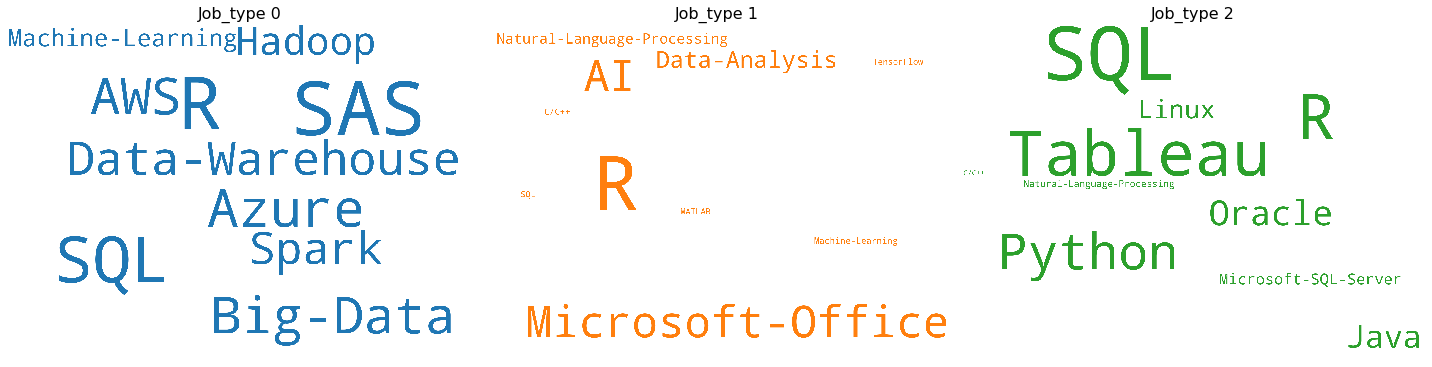

In [73]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=STOPWORDS,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=100,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(1, num_topics, figsize=(20,6), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=400)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Job_type ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

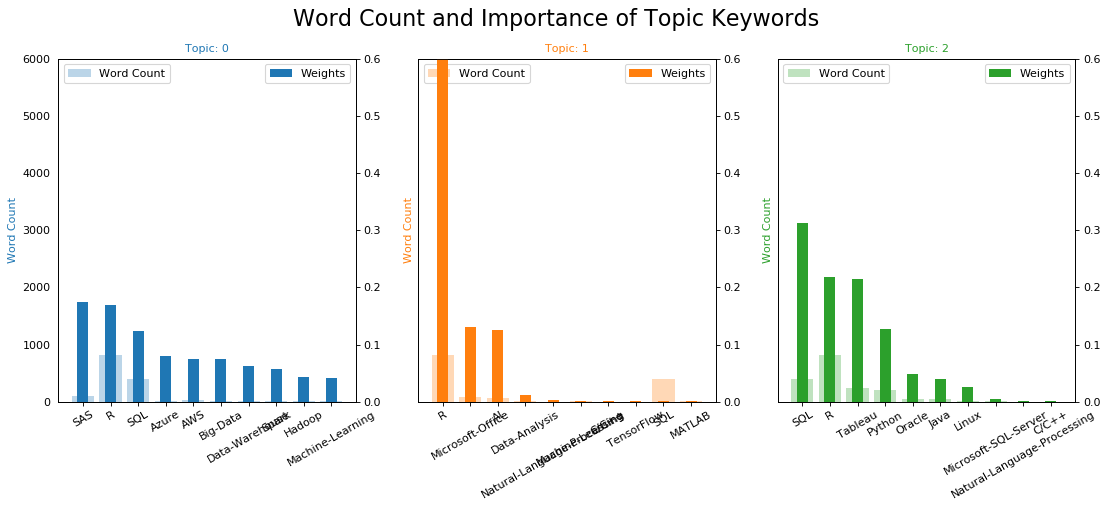

In [74]:
from collections import Counter
topics = lda_model.show_topics(formatted=False)
data_flat = [w for w_list in data_ready for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(1, num_topics, figsize=(14,6), sharey=True, dpi=80)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.8, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.4, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.6); ax.set_ylim(0, 6000)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=10)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'center')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=20, y=1.05)    
plt.show()

In [75]:
#df.to_csv('df_topic.csv')

In [76]:
# Sentence Coloring of N Sentences
def topics_per_document(model, corpus, start=0, end=1):
    corpus_sel = corpus[start:end]
    dominant_topics = []
    topic_percentages = []
    for i, corp in enumerate(corpus_sel):
        topic_percs, wordid_topics, wordid_phivalues = model[corp]
        dominant_topic = sorted(topic_percs, key = lambda x: x[1], reverse=True)[0][0]
        dominant_topics.append((i, dominant_topic))
        topic_percentages.append(topic_percs)
    return(dominant_topics, topic_percentages)

dominant_topics, topic_percentages = topics_per_document(model=lda_model, corpus=corpus, end=-1)            

# Distribution of Dominant Topics in Each Document
df = pd.DataFrame(dominant_topics, columns=['Document_Id', 'Dominant_Topic'])
dominant_topic_in_each_doc = df.groupby('Dominant_Topic').size()
df_dominant_topic_in_each_doc = dominant_topic_in_each_doc.to_frame(name='count').reset_index()

# Total Topic Distribution by actual weight
topic_weightage_by_doc = pd.DataFrame([dict(t) for t in topic_percentages])
df_topic_weightage_by_doc = topic_weightage_by_doc.sum().to_frame(name='count').reset_index()

# Top 3 Keywords for each Topic
topic_top3words = [(i, topic) for i, topics in lda_model.show_topics(formatted=False) 
                                 for j, (topic, wt) in enumerate(topics) if j < 4]

df_top3words_stacked = pd.DataFrame(topic_top3words, columns=['topic_id', 'words'])
df_top3words = df_top3words_stacked.groupby('topic_id').agg(', \n'.join)
df_top3words.reset_index(level=0,inplace=True)

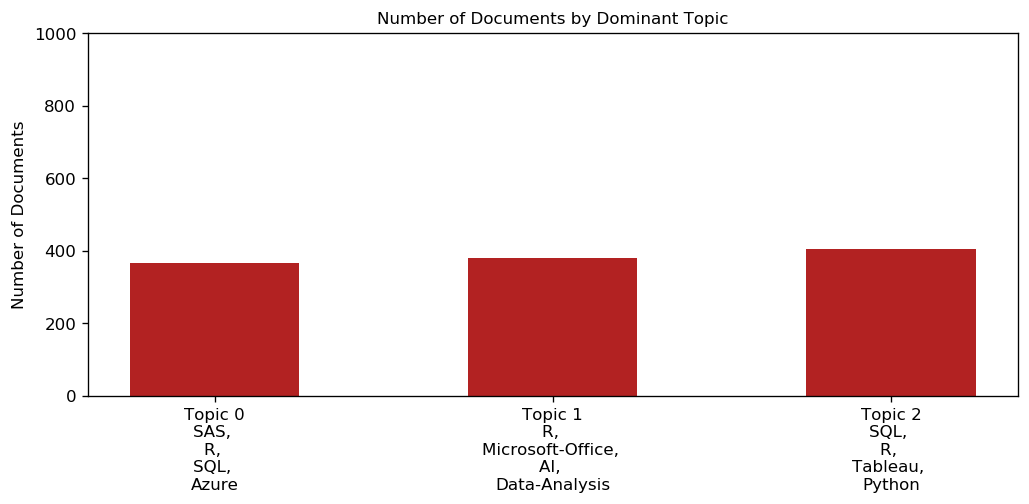

In [77]:
from matplotlib.ticker import FuncFormatter

# Plot
fig, (ax1) = plt.subplots(1, 1, figsize=(10, 4), dpi=120, sharey=True)

# Topic Distribution by Dominant Topics
ax1.bar(x='Dominant_Topic', height='count', data=df_dominant_topic_in_each_doc, width=.5, color='firebrick')
ax1.set_xticks(range(df_dominant_topic_in_each_doc.Dominant_Topic.unique().__len__()))
tick_formatter = FuncFormatter(lambda x, pos: 'Topic ' + str(x)+ '\n' + df_top3words.loc[df_top3words.topic_id==x, 'words'].values[0])
ax1.xaxis.set_major_formatter(tick_formatter)
ax1.set_title('Number of Documents by Dominant Topic', fontdict=dict(size=10))
ax1.set_ylabel('Number of Documents')
ax1.set_ylim(0, 1000)

plt.show()

In [78]:
# Get topic weights and dominant topics ------------
from sklearn.manifold import TSNE
from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook

# Get topic weights
topic_weights = []
for i, row_list in enumerate(lda_model[corpus]):
    topic_weights.append([w for i, w in row_list[0]])

# Array of topic weights    
arr = pd.DataFrame(topic_weights).fillna(0).values

# Keep the well separated points (optional)
arr = arr[np.amax(arr, axis=1) > 0.35]

# Dominant topic number in each doc
topic_num = np.argmax(arr, axis=1)

# tSNE Dimension Reduction
tsne_model = TSNE(n_components=2, verbose=1, random_state=0, angle=.99, init='pca')
tsne_lda = tsne_model.fit_transform(arr)

# Plot the Topic Clusters using Bokeh
output_notebook()
n_topics = num_topics
mycolors = np.array([color for name, color in mcolors.TABLEAU_COLORS.items()])
plot = figure(title="t-SNE Clustering of {} LDA Topics".format(n_topics), 
              plot_width=1200, plot_height=600)
plot.scatter(x=tsne_lda[:,0], y=tsne_lda[:,1], color=mycolors[topic_num])
show(plot)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 852 samples in 0.000s...
[t-SNE] Computed neighbors for 852 samples in 0.009s...
[t-SNE] Computed conditional probabilities for sample 852 / 852
[t-SNE] Mean sigma: 0.000004
[t-SNE] KL divergence after 250 iterations with early exaggeration: 45.180267
[t-SNE] KL divergence after 1000 iterations: 0.150781


Loading BokehJS ...

In [79]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary=lda_model.id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.073643 -0.213962       1        1  51.262730
1     -0.251189  0.051853       2        1  27.346531
0      0.177546  0.162109       3        1  21.390734, topic_info=                Term        Freq       Total Category  logprob  loglift
4                  R  752.000000  752.000000  Default  28.0000  28.0000
10           Tableau  240.000000  240.000000  Default  27.0000  27.0000
5                SQL  409.000000  409.000000  Default  26.0000  26.0000
13               SAS   81.000000   81.000000  Default  25.0000  25.0000
7   Microsoft-Office   79.000000   79.000000  Default  24.0000  24.0000
..               ...         ...         ...      ...      ...      ...
19            Oracle    0.503804   55.228504   Topic3  -6.8341  -3.1548
15                AI    0.488260   75.523018   Topic3  -6.8654  -3.4991
7   Microsoft-Office    0.476260   79.398560   Topic3  -6.8903  -3.5741
3             Python    0.654419  143.972137   Topic3  -6.5725  -3.8514
10           Tableau    0.527341  240.978226   Topic3  -6.7884  -4.5824

[112 rows x 6 columns], token_table=      Topic      Freq                         Term
term                                              
15        2  0.993075                           AI
0         3  0.978991                          AWS
22        3  0.978525                        Azure
17        3  0.980323                     Big-Data
23        1  0.701837                        C/C++
8         2  0.924269                Data-Analysis
1         3  0.963468               Data-Warehouse
16        3  0.964089                       Hadoop
2         3  0.752799                         Hive
9         1  0.987538                         Java
9         3  0.021945                         Java
26        3  0.639465                        Kafka
11        1  0.905558                        Linux
11        3  0.093678                        Linux
12        3  0.919769                       MATLAB
18        3  0.961286             Machine-Learning
7         2  0.982386             Microsoft-Office
21        1  0.846954         Microsoft-SQL-Server
27        1  0.092438  Natural-Language-Processing
27        2  0.184876  Natural-Language-Processing
27        3  0.739504  Natural-Language-Processing
24        3  0.963907                        NoSQL
19        1  0.977756                       Oracle
19        3  0.018107                       Oracle
3         1  0.993248                       Python
3         3  0.006946                       Python
4         1  0.324059                            R
4         2  0.571087                            R
4         3  0.104921                            R
13        3  0.988622                          SAS
5         1  0.857098                          SQL
5         3  0.141629                          SQL
14        3  0.702599                        Scala
20        3  0.546812                    Scripting
6         3  0.985565                        Spark
10        1  0.995941                      Tableau
10        3  0.004150                      Tableau
25        1  0.467097                   TensorFlow
25        3  0.467097                   TensorFlow, R=28, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 2, 1])

In [81]:
p = pyLDAvis.gensim.prepare(lda_model, corpus, lda_model.id2word)
pyLDAvis.save_html(p, 'lda_NY.html')